In [1]:
import pandas as pd
import matplotlib as mpl
import random
import json
import folium
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means Clustering을 해보자.

#### 1. 가져온 데이터를 preprocessing을 하고 standardize해주자.
#### 2. elbow method를 사용하여 K를 구하고 k-means 알고리즘을 적용하자.
#### 3. 결과값을 folium으로 보여주자. 

## 1. 가져온 데이터를 preprocessing을 하고 standardize해주자.

In [2]:
# 최종 dataframe 후보 1을 가져오자. 
dataframe_raw = pd.read_csv("modified_Data/attribute_선별한 dataframe_초안_1.csv", encoding='utf-8')
dataframe = dataframe_raw.copy()

In [3]:
# 필요없는 column을 drop하자.
dataframe.drop(columns='Unnamed: 0', inplace=True)

In [4]:
len(dataframe)

424

In [5]:
# dataframed에서 문자열 값을 없애보자. 그리고 없앤 값을 temp_dataset에 저장하자. 
dong_dataframe = dataframe.drop(columns=['자치구', '동'])

In [6]:
len(dong_dataframe)

424

In [7]:
# dataset을 normal distribution으로 standardize해준다. 
dataframe_standardized = preprocessing.scale(dong_dataframe)
dataframe_standardized = pd.DataFrame(dataframe_standardized)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [8]:
dataframe_standardized

,0,1,2,3,4,5,6,7
0,-1.358827,-0.771365,0.843142,0.049080,-1.704132,0.115824,0.543609,-0.887201
1,-2.002025,-1.165003,-0.624600,-0.065888,-1.703996,0.181073,-0.419259,-0.870269
2,-1.290264,-0.729404,-0.722415,-1.132221,-1.703861,0.146886,0.613822,-0.914210
3,-0.473226,-0.229376,-0.631963,-0.913781,-1.703726,0.323766,1.513182,-0.962242
4,-1.507397,-0.862290,-0.741347,0.201413,-1.703591,0.324907,0.181607,-0.886861
5,-1.260798,-0.711371,-0.838109,0.939367,-1.703456,1.899476,-0.144406,-0.831066
6,-1.861561,-1.079039,-0.627756,-0.065888,-1.703185,-0.003842,-0.138408,-0.901428
7,-1.488134,-0.850501,7.315198,-0.655102,-1.703050,-0.156868,0.622996,-0.892680
8,-1.761339,-1.017702,2.982965,-0.655102,-1.702780,-0.137454,0.115276,-0.883577
9,-1.472972,-0.841222,-0.342726,-0.028523,-1.702645,-0.207122,0.715084,-0.886213


## 2. elbow method를 사용하여 K를 구하고 k-means 알고리즘을 적용하자

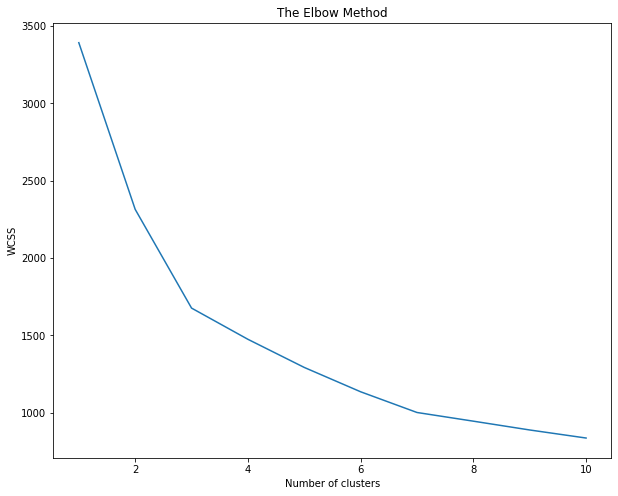

In [9]:
# find the appropriate cluster number
# k-means에서 appropriate한 값을 찾아줘야 한다. 하지만, domain 지식이 없다면 아래를 사용하여 찾아볼 수도 있다. 
# 가장 적절한 K를 고르는 방법이 있긴 하다. 
# K 갯수에 따라 cost function J를 그려보았을 때, 
# 특정 K 이후 cost가 거의 변하지 않는 elbow point 가 있다면 그 K를 선택하는 것이 합리적일 것이다.

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataframe_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# k = 7로 해보자. 

In [13]:
# Fitting K-Means to the dataset
# K-means를 dataset에 fit한다. 
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataframe_standardized)

#beginning of  the cluster numbering with 1 instead of 0
# cluster가 0으로 시작하는데 1로 시작하게 1을 더하자. 
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
# cluser라는 새로운 dataframe을 만들자. 
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
# dataframe에 cluster라는 column을 새로 만들자. 
dataframe['cluster'] = cluster
dataframe_standardized['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataframe_standardized.groupby('cluster').mean(),1))
kmeans_mean_cluster

,0,1,2,3,4,5,6,7
cluster,,,,,,,,
1,-0.1,-0.5,-0.2,-0.6,-0.6,-0.7,-0.4,-1.1
2,0.4,1.2,0.0,2.1,1.2,2.1,1.7,0.4
3,-0.2,-0.2,-0.3,-0.2,0.8,-0.3,-0.4,1.0
4,-1.4,-0.8,4.5,-0.4,-1.2,0.1,-0.1,-0.4
5,-1.0,-0.5,-0.3,0.2,-1.4,0.6,-0.1,-0.5
6,1.3,0.7,0.5,0.1,0.6,-0.1,0.1,0.8
7,2.3,3.7,1.3,1.9,1.2,2.5,3.7,0.5


In [14]:
dataframe

,자치구,동,edu_percent,동별_친환경자동차수,합계_사업체수,㎡당 매매평균가,행정구역코드,가구수별_승용차수,동별_수소차_대수,택시,cluster
0,종로구,사직동,8319.397863,95.695177,3544,756.00,1101053.0,0.144169,0.569495,1.653815e+09,5
1,종로구,삼청동,2603.942721,29.952259,753,716.00,1101054.0,0.150556,0.170688,1.689370e+09,5
2,종로구,부암동,8928.650976,102.703207,567,345.00,1101055.0,0.147209,0.598577,1.597098e+09,5
3,종로구,평창동,16188.846626,186.214745,739,421.00,1101056.0,0.164524,0.971080,1.496236e+09,5
4,종로구,무악동,6999.208224,80.509489,531,809.00,1101057.0,0.164636,0.419559,1.654529e+09,5
5,종로구,교남동,9190.485763,105.715003,347,1065.75,1101058.0,0.318773,0.284528,1.771692e+09,5
6,종로구,가회동,3852.106609,44.309460,747,716.00,1101060.0,0.132454,0.287013,1.623939e+09,5
7,종로구,종로1.2.3.4가동,7170.375302,82.478365,15851,511.00,1101061.0,0.117474,0.602376,1.642308e+09,4
8,종로구,종로5.6가동,4742.683830,54.553464,7613,511.00,1101063.0,0.119375,0.392085,1.661424e+09,4
9,종로구,이화동,7305.105824,84.028124,1289,729.00,1101064.0,0.112555,0.640518,1.655889e+09,5


## 3. 결과값을 folium으로 보여주자. 

In [15]:
# 필요한 geo_data 가져오기.
geo_path = "raw_Data/geoData_copy.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [21]:
# seoul_map_car라는 map을 만들고 Chropleth 만들기.
cluster_seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")

folium.Choropleth(geo_data=geo_str, 
                     data = dataframe,
                     columns=['동', 'cluster'],
                     fill_color='PuRd', 
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="cluster").add_to(cluster_seoul_map)

In [22]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(cluster_seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(cluster_seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(cluster_seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(cluster_seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(cluster_seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(cluster_seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(cluster_seoul_map)

In [23]:
cluster_seoul_map.save("Visualization/cluster_seoul_map.html")